# Alloy4Fun Data

## Import Data

In [1]:
import pandas as pd, os 
import collections
import matplotlib.pyplot as plt

def importDataFromDir(dir):
    # Import all the data from a directory
    # dir: directory with the data
    # return: a dictionary of dataframes
    dict = {}

    for file in os.listdir(dir):
        if file.endswith('.json'):
            df = pd.read_json(f'{dir}/' + file, lines=True)
            dict[file.removesuffix(".json")] = df
            print(f"Imported {file}.")

    return dict

In [2]:
# Import files from the data directory
dict = importDataFromDir('data/submissions')

Imported 9jPK8KBWzjFmBx4Hb.json.
Imported FwCGymHmbqcziisH5.json.
Imported gAeD3MTGCCv8YNTaK.json.
Imported JC8Tij8o8GZb99gEJ.json.
Imported jyS8Bmceejj9pLbTW.json.
Imported PQAJE67kz8w5NWJuM.json.
Imported sDLK7uBCbgZon3znd.json.
Imported WGdhwKZnCu7aKhXq9.json.
Imported YH3ANm7Y5Qe5dSYem.json.
Imported zoEADeCW2b2suJB2k.json.
Imported zRAn69AocpkmxXZnW.json.


## Data Cleaning

### Check null values

In [3]:
df1 = dict["9jPK8KBWzjFmBx4Hb"]
df1.head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
0,zKAYz8BCDmHKgNoSx,1.0,7.0,prop8Ok,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,9jPK8KBWzjFmBx4Hb,1.0,2020-12-13 23:28:11,NaN,NaN
1,8FmQ9PNWT2SXncTxX,1.0,9.0,prop10Ok,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,9jPK8KBWzjFmBx4Hb,1.0,2019-11-11 21:54:33,NaN,NaN
2,eyGu5DYCrnk58G2fJ,1.0,6.0,prop7Ok,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,9jPK8KBWzjFmBx4Hb,1.0,2020-12-1 11:55:11,NaN,NaN
3,Akbr9Aq6WfBLHrvE8,1.0,18.0,prop19Ok,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,9jPK8KBWzjFmBx4Hb,1.0,2020-11-26 10:33:29,NaN,NaN
4,MNegade3hLiutxCru,1.0,10.0,prop11Ok,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,9jPK8KBWzjFmBx4Hb,1.0,2020-1-19 17:06:22,NaN,NaN


In [4]:
df1.isnull().sum()

_id                0
cmd_c            915
cmd_i             35
cmd_n            915
code               0
derivationOf       0
original           0
sat               35
time               0
msg             4353
theme           5218
dtype: int64

Features meaning:
- _id: the id of the interaction
- time: the timestamp of its creation
- derivationOf: the parent entry
- original: the first ancestor with secrets (always the same within an exercise)
- code: the complete code of the model (excluding the secrets defined in the original entry) (with student comments removed)
- sat: whether the command was satisfiable (counter-example found for checks), or -1 when error thrown [only for executions]
- cmd_i: the index of the executed command [only for executions]
- cmd_n: the name of the executed command [only for successful executions, i.e. no error thrown]
- cmd_c: whether the command was a check [only for successful executions, i.e. no error thrown]
- msg: the error or warning message [only for successful executions with warnings or when error thrown]
- theme: the visualisation theme [only for sharing entries

#### cmd_i null values

cmd_i is null for non-executions. 

In [5]:
# Filter rows with cmd_i = null
nullDF = df1[df1["cmd_i"].isnull()]
nullDF.head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
32,P3gFuEkajduWTyFeo,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,6YmxWkc8PtXEqdafi,9jPK8KBWzjFmBx4Hb,NaN,2019-10-31 11:47:23,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
159,K2ejbWj7HT3mSFdym,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,4zDygwoYWF7AAqHv8,9jPK8KBWzjFmBx4Hb,NaN,2020-1-3 13:48:36,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
301,MdZs9uee25QgFwvi7,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,kb8KrpANCxg9XXcLs,9jPK8KBWzjFmBx4Hb,NaN,2019-10-31 11:48:12,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
337,fWKpSLkdPZPxkSoJe,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,8KGv5F6b8ySPofNdJ,9jPK8KBWzjFmBx4Hb,NaN,2019-10-31 11:52:15,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
353,ggNDTsgGfpet9HqvY,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,NdNtvRAx8r85Fivh8,9jPK8KBWzjFmBx4Hb,NaN,2020-11-24 01:32:37,NaN,"{'currentFramePosition': {}, 'currentlyProject..."


In [6]:
print("Rows with cmd_i null: ", len(nullDF))
print("Rows with sat null: ", len(nullDF[nullDF["sat"].isnull()]))
print("Rows with cmd_c null : ", len(nullDF[nullDF["cmd_c"].isnull()]))
print("Rows with cmd_n null : ", len(nullDF[nullDF["cmd_n"].isnull()]))
print("Rows with theme null : ", len(nullDF[nullDF["theme"].isnull()]))

Rows with cmd_i null:  35
Rows with sat null:  35
Rows with cmd_c null :  35
Rows with cmd_n null :  35
Rows with theme null :  0


Whenever cmd_i is null it means that there was no execution. It is the sharing of a model. This cases might be irrelevant to the problem so they can be dropped.

In [7]:
def shortCircuit(df, row, index):
    # Short circuit the derivation of a row.
    # If A derives B and B derives C, then A derives C and B is removed.
    # df: dataframe
    # row: row to short circuit
    # return: dataframe with the row short circuited

    # Get row information
    id = row["_id"]
    derivation = row["derivationOf"]

    # Remove row
    df.drop(index, inplace=True)

    # Get derivations of row
    derivationSet = df[df["derivationOf"] == id] 
    # Short circuit derivations
    df.loc[df["derivationOf"] == id, "derivationOf"] = derivation

    return df

def dropNulls(dict, col):
    # Remove rows with col null
    # dict: dictionary of dataframes
    # return: dataframe with rows with col null removed

    for df in dict.values():
        # Filter rows with col= null
        nullDF = df[df[col].isnull()]
        # Short circuit derivations
        for index, row in nullDF.iterrows():
            df = shortCircuit(df, row, index)

    return dict


# Drop rows with cmd_i null
dict = dropNulls(dict, "cmd_i")
# Check results
df1 = dict["9jPK8KBWzjFmBx4Hb"]
nullDF = df1[df1["cmd_i"].isnull()]
nullDF.head()


,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme


#### cmd_c and cmd_n null values

In [8]:
# Filter rows with cmd_c = null
nullDF = df1[df1["cmd_c"].isnull()]
nullDF.head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
13,nuWnon2d7N7N7ZFvw,NaN,7.0,NaN,/**\n * Linear temporal logic revision exercis...,ZjxPhwuLGd52cZyox,9jPK8KBWzjFmBx4Hb,-1.0,2020-11-23 23:09:43,There are 1 possible tokens that can appear he...,NaN
14,sxuHvWgfPeRh9QYYy,NaN,7.0,NaN,/**\n * Linear temporal logic revision exercis...,RBovdMdE7s7k2Z3xY,9jPK8KBWzjFmBx4Hb,-1.0,2020-12-1 21:46:47,There are 37 possible tokens that can appear h...,NaN
16,xPeTe3FdpxzspZTta,NaN,7.0,NaN,/**\n * Linear temporal logic revision exercis...,t45BxKKpdXbYN4Aun,9jPK8KBWzjFmBx4Hb,-1.0,2020-11-26 10:17:06,There are 1 possible tokens that can appear he...,NaN
20,GQbQyxLarysc73gH7,NaN,3.0,NaN,/**\n * Linear temporal logic revision exercis...,2js6dSN2dk4HhJmbF,9jPK8KBWzjFmBx4Hb,-1.0,2020-12-1 11:39:04,There are 37 possible tokens that can appear h...,NaN
25,CCt6wniT5St2hKKFr,NaN,0.0,NaN,/**\n * Linear temporal logic revision exercis...,9jPK8KBWzjFmBx4Hb,9jPK8KBWzjFmBx4Hb,-1.0,2019-10-31 10:48:50,There are 29 possible tokens that can appear h...,NaN


In [9]:
print("Rows with cmd_c null: ", len(nullDF))
print("Rows with cmd_n null: ", len(nullDF[nullDF["cmd_n"].isnull()]))
print("Rows with msg null: ", len(nullDF[nullDF["msg"].isnull()]))
print("Rows with negative sat: ", len(nullDF[nullDF["sat"] == -1]))

Rows with cmd_c null:  880
Rows with cmd_n null:  880
Rows with msg null:  0
Rows with negative sat:  880


Whenever cmd_c is null, cmd_n is also null. These values are null for cases where a syntactic error is thrown and a msg appears.
The code in these case is not parseable. We can drop these rows.

In [10]:
# drop rows with cmd_c null
dict = dropNulls(dict, "cmd_c")
# Check results
df1 = dict["9jPK8KBWzjFmBx4Hb"]
df1.isnull().sum()

_id                0
cmd_c              0
cmd_i              0
cmd_n              0
code               0
derivationOf       0
original           0
sat                0
time               0
msg             4318
theme           4338
dtype: int64

Dealing with mgs and theme null values is not important in these context.

### Remove extra features

#### cmd_c feature

Counter({1.0: 21234, 0.0: 23})


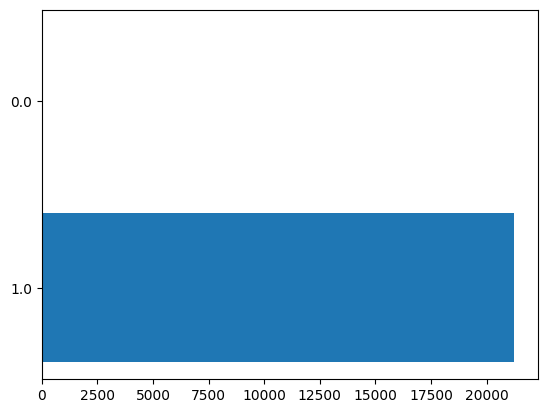

In [11]:
def countValues(dict, col):
    # Count the values in a column
    # df: dataframe
    # col: column to count
    # return: dataframe with the counts
    totalCount = collections.Counter()

    for df in dict.values():
        count = df[col].value_counts().to_dict()
        totalCount.update(count)        

    return totalCount

# Count the different values in the cmd_c column across all the dataframes
counter = countValues(dict, 'cmd_c')
print(counter)

plt.barh([str(k) for k in counter.keys()], counter.values())
plt.show()


The number of 0 values for the column cmd_c is irrelevant (when the executed command is not a check). For that reason, entries with these values should be dropped.

In [12]:
def dropNonChecks(dict):
    # Drop the rows that are not checks
    # dict: dictionary of dataframes
    # return: dataframe with the rows that are not checks removed

    for df in dict.values():
        # Filter rows with cmd_c != 0
        dfToDrop = df[df["cmd_c"] == 0]
        # Short circuit derivations
        for index, row in dfToDrop.iterrows():
            df = shortCircuit(df, row, index)

    return dict

# Remove the rows with the value 0 in the cmd_c column
dropNonChecks(dict)

# Count the different values in the cmd_c column
print(countValues(dict, 'cmd_c'))

Counter({1.0: 21234})


#### original feature

In [13]:
def operateDFs(dict, op, arg):
    # Operate on each dataframe in a dictionary
    # dict: dictionary of dataframes
    # op: operation to perform
    # arg: argument to pass to the operation
    for df in dict.values():
        op(df, arg)

# Count the different values for the original column for each dataframe
countValuesOp = (lambda df, arg: print(df[arg].value_counts().to_dict()))
operateDFs(dict, countValuesOp, 'original')

{'9jPK8KBWzjFmBx4Hb': 4338}
{'FwCGymHmbqcziisH5': 972}
{'gAeD3MTGCCv8YNTaK': 1764}
{'JC8Tij8o8GZb99gEJ': 665}
{'jyS8Bmceejj9pLbTW': 459}
{'PQAJE67kz8w5NWJuM': 1934}
{'sDLK7uBCbgZon3znd': 2216}
{'WGdhwKZnCu7aKhXq9': 283}
{'YH3ANm7Y5Qe5dSYem': 3478}
{'zoEADeCW2b2suJB2k': 1633}
{'zRAn69AocpkmxXZnW': 3492}


Every dataframe has the same value for the original column. This column is irrelevant.

Now we will drop the irrelevant columns. 

In [14]:
# Drop columns that are not needed
dropColOp = (lambda df, arg: df.drop(columns=arg, axis=1, inplace=True))
operateDFs(dict, dropColOp, ["cmd_c", "cmd_i", "original", "time", "msg", "theme"])

dict["9jPK8KBWzjFmBx4Hb"].head()

,_id,cmd_n,code,derivationOf,sat
0,zKAYz8BCDmHKgNoSx,prop8Ok,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,1.0
1,8FmQ9PNWT2SXncTxX,prop10Ok,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,1.0
2,eyGu5DYCrnk58G2fJ,prop7Ok,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,1.0
3,Akbr9Aq6WfBLHrvE8,prop19Ok,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,1.0
4,MNegade3hLiutxCru,prop11Ok,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,1.0


### Code cleaning

The code in this dataset comes with comments that can be removed.

In [15]:
import re # regular expressions

def cleanCode(code):
    # Remove comments and empty lines
    # code: string with the code
    # return: string with the code without comments and empty lines
    code = re.sub(r"(/\*(.|\n)*?\*/)|(//.*)", "", code) # remove comments
    code = re.sub(r"\n\n(?=\n)", "", code) # remove empty lines
    
    return code.replace("\n", "").replace("\t", "")

def applyToCol(df, col, op):
    # Apply an operation to a column
    # df: dataframe
    # col: column to apply the operation
    # op: operation to apply
    # return: dataframe with the operation applied
    df[col] = df[col].apply(op)
    return df

# Clean the code column
cleanCodeOp = (lambda df, arg: applyToCol(df, arg, cleanCode))
operateDFs(dict, cleanCodeOp, "code")

df1.head()


,_id,cmd_n,code,derivationOf,sat
0,zKAYz8BCDmHKgNoSx,prop8Ok,var sig File {var link : lone File}var sig Tra...,dvhCng5AdxC8MqjFy,1.0
1,8FmQ9PNWT2SXncTxX,prop10Ok,var sig File {var link : lone File}var sig Tra...,5eT7wTw5kT8DwTbu2,1.0
2,eyGu5DYCrnk58G2fJ,prop7Ok,var sig File {var link : lone File}var sig Tra...,niLmMRmm94Hz6ymcD,1.0
3,Akbr9Aq6WfBLHrvE8,prop19Ok,var sig File {var link : lone File}var sig Tra...,DnAm62D7JaqDzyy5y,1.0
4,MNegade3hLiutxCru,prop11Ok,var sig File {var link : lone File}var sig Tra...,cjK4u23ZAfYm8fatA,1.0


We can also look for duplicate code.

In [16]:
print("Duplicate code: ", len(df1["code"])-len(df1["code"].drop_duplicates()))

Duplicate code:  834


There is a lot of entries with repeated code. However, if we drop duplicates we might lose information on student sessions.

### cmd_n rename

Rename cmd_n so that it equals the predicate completed by the student.

In [17]:
def removeExtraSuffix(pred):
    return re.sub("OK|Ok|ok", "", pred)

remSuffixOp = (lambda df, arg: applyToCol(df, arg, removeExtraSuffix))
operateDFs(dict, remSuffixOp, "cmd_n")

df1.head()

,_id,cmd_n,code,derivationOf,sat
0,zKAYz8BCDmHKgNoSx,prop8,var sig File {var link : lone File}var sig Tra...,dvhCng5AdxC8MqjFy,1.0
1,8FmQ9PNWT2SXncTxX,prop10,var sig File {var link : lone File}var sig Tra...,5eT7wTw5kT8DwTbu2,1.0
2,eyGu5DYCrnk58G2fJ,prop7,var sig File {var link : lone File}var sig Tra...,niLmMRmm94Hz6ymcD,1.0
3,Akbr9Aq6WfBLHrvE8,prop19,var sig File {var link : lone File}var sig Tra...,DnAm62D7JaqDzyy5y,1.0
4,MNegade3hLiutxCru,prop11,var sig File {var link : lone File}var sig Tra...,cjK4u23ZAfYm8fatA,1.0


## Add Predicate Expression column

Import Java library.

In [18]:
import jpype # Java

# Import the Java libraries
if not jpype.isJVMStarted():
    jpype.startJVM(classpath=['lib/Parser/parser.jar'])

# Import the Java classes
Parser = jpype.JClass('org.higena.A4FParser')
CompUtil = jpype.JClass('edu.mit.csail.sdg.parser.CompUtil')
Reporter = jpype.JClass('edu.mit.csail.sdg.alloy4.A4Reporter')
SyntaxError = jpype.JClass('edu.mit.csail.sdg.alloy4.ErrorSyntax')

Separate dataframes into separate dataframes for each predicate. 

In [19]:
def parseChallenge(dict):
    # Parse a challenge file
    # dict: dictionary of dataframes
    # return: the parsed challenges
    parsed = {}
    folder = "data/challenges/"

    for challengeID, df in dict.items():
        # Set file path
        file = folder + challengeID + ".als"
        # Parse file
        parsed[challengeID] = CompUtil.parseEverything_fromFile(Reporter(), None, file)

    return parsed 

def genFunColumns(challenge):
    # Generate a dictionary with the function names as keys and an empty list as value
    # challenge: parsed challenge
    # return: list of functions

    columns = [] # Initialize dictionary
    functions = challenge.getAllFunc() # Get all the functions

    # Add the functions to the dictionary
    for fun in functions:
        if "$$Default" not in fun.label: # Ignore default pred
            columns.append(str(fun.label).removeprefix("this/"))
    
    return columns

def separateDFbyPred(dict, parseChallenges):
    # Separate the dataframes by predicate
    # dict: dictionary of dataframes for each challenge
    # parseChallenges: dictionary of parsed challenges
    # return: dictionary of dataframes for each challenge and each predicate: dict[challenge][predicate]
     
    # Dictionary of dataframes for each exercise
    allDfs = {}
    # Iterate over the dataframes
    for key, df in dict.items():
        allDfs[key] = {} # init the challenge dictionary
        challengePreds = list(genFunColumns(parseChallenges[key])) # Get the list of functions from the challenge
        # Iterate over the exercises
        for pred in challengePreds:
            # Store the dataframe for the exercise
            allDfs[key][pred] = df[df["cmd_n"] == pred].copy()
    
    return allDfs


parsedChallenges = parseChallenge(dict)
allDfs = separateDFbyPred(dict, parsedChallenges)

# Check
for challenge, preds in allDfs.items():
    print(challenge, list(preds.keys()))

allDfs["9jPK8KBWzjFmBx4Hb"]["prop1"].head()

9jPK8KBWzjFmBx4Hb ['prop1', 'prop2', 'prop3', 'prop4', 'prop5', 'prop6', 'prop7', 'prop8', 'prop9', 'prop10', 'prop11', 'prop12', 'prop13', 'prop14', 'prop15', 'prop16', 'prop17', 'prop18', 'prop19', 'prop20']
FwCGymHmbqcziisH5 ['prop1', 'prop2', 'prop3', 'prop4', 'prop5', 'prop6', 'prop7', 'prop8', 'prop9', 'prop10', 'prop11', 'prop12', 'prop13', 'prop14', 'prop15', 'prop16', 'prop17', 'prop18']
gAeD3MTGCCv8YNTaK ['undirected', 'oriented', 'acyclic', 'complete', 'noLoops', 'weaklyConnected', 'stonglyConnected', 'transitive']
JC8Tij8o8GZb99gEJ ['Inv1', 'Inv2', 'Inv3', 'Inv4']
jyS8Bmceejj9pLbTW ['Inv1', 'Inv2', 'Inv3', 'Inv4']
PQAJE67kz8w5NWJuM ['inv1', 'inv2', 'inv3', 'inv4', 'inv5', 'inv6', 'inv7', 'inv8', 'inv9', 'inv10']
sDLK7uBCbgZon3znd ['inv1', 'inv2', 'inv3', 'inv4', 'inv5', 'inv6', 'inv7', 'inv8', 'inv9', 'inv10']
WGdhwKZnCu7aKhXq9 ['Inv1', 'Inv2', 'Inv3', 'Inv4']
YH3ANm7Y5Qe5dSYem ['inv1', 'inv2', 'inv3', 'inv4', 'inv5', 'inv6', 'inv7', 'inv8', 'inv9', 'inv10', 'inv11', 'inv12

,_id,cmd_n,code,derivationOf,sat
166,BTJstCSFzkYQBsQx6,prop1,var sig File {var link : lone File}var sig Tra...,29YEArmvK27JPiTia,0.0
169,xkuuzm3We6L5nhycr,prop1,var sig File {var link : lone File}var sig Tra...,9jPK8KBWzjFmBx4Hb,1.0
182,qCP5Z52W7HPyPhM66,prop1,var sig File {var link : lone File}var sig Tra...,9YjrCv4G59r5iMJ9Y,1.0
255,g3pdisnaMXvFwwdJH,prop1,var sig File {var link : lone File}var sig Tra...,EMz6E2zDEyB6JkAdX,0.0
290,ZA4XCBD3yxP9xNLRK,prop1,var sig File {var link : lone File}var sig Tra...,9jPK8KBWzjFmBx4Hb,0.0


Generate Expr column that contains the expression written by the student to the respective predicate.

In [20]:
def getExpr(code: str, predicateID: str):
    # Get the expression of a predicate
    # code: string with the code
    # predicateID: id of the predicate
    # return: string with the expression of the predicate

    reg = r"pred " + predicateID + r"\s?\{(.*?)\}"
    predicate = re.search(reg, code)

    if predicate:
        return predicate.group(1)
    else:
        print("ERROR predicate ", predicateID,  " not found.")
        return None

def genExprColumn(allDfs):
    # Iterate over the challenges
    for cmdDfs in allDfs.values():
        # Iterate over the submission for each command
        for cmd, df in cmdDfs.items():
            df["expr"] = df["code"].apply(getExpr, args=(str(cmd),))
           

# Generate the expression column
genExprColumn(allDfs)

allDfs["9jPK8KBWzjFmBx4Hb"]["prop1"].head()


ERROR predicate  inv4  not found.
ERROR predicate  inv4  not found.
ERROR predicate  inv10  not found.
ERROR predicate  inv10  not found.


,_id,cmd_n,code,derivationOf,sat,expr
166,BTJstCSFzkYQBsQx6,prop1,var sig File {var link : lone File}var sig Tra...,29YEArmvK27JPiTia,0.0,no Trash and no Protected
169,xkuuzm3We6L5nhycr,prop1,var sig File {var link : lone File}var sig Tra...,9jPK8KBWzjFmBx4Hb,1.0,
182,qCP5Z52W7HPyPhM66,prop1,var sig File {var link : lone File}var sig Tra...,9YjrCv4G59r5iMJ9Y,1.0,before no Trash + Protected
255,g3pdisnaMXvFwwdJH,prop1,var sig File {var link : lone File}var sig Tra...,EMz6E2zDEyB6JkAdX,0.0,no Trash and no (Protected )
290,ZA4XCBD3yxP9xNLRK,prop1,var sig File {var link : lone File}var sig Tra...,9jPK8KBWzjFmBx4Hb,0.0,historically (no Trash and no Protected)


Remove submissions with errors.

In [21]:
# Drop submissions with null expressions
allDfs["zRAn69AocpkmxXZnW"] = dropNulls(allDfs["zRAn69AocpkmxXZnW"], "expr")

# Check
dfInv4 = allDfs["zRAn69AocpkmxXZnW"]["inv4"]
dfInv4[dfInv4["expr"].isnull()].head()

,_id,code,derivationOf,sat,cmd_n,expr


## Add AST column

In [31]:
def parseExpr(expr, parsedChallenge):
    # Parse an expression
    # expr: string with the expression
    # parsedChallenge: parsed challenge module
    # return: parsed expression
    print("Parsing expression: ", expr)

    return str(Parser.parse(expr, parsedChallenge))

def addASTsColumns(allDfs, parseChallenges):
    # Add the ASTs columns
    # allDfs: dictionary of dataframes for each challenge and each predicate
    # parseChallenges: dictionary of parsed challenges
    # return: dictionary of dataframes for each challenge and each predicate with the ASTs columns

    # Iterate over the challenges
    for challenge, cmdDfs in allDfs.items():
        # Iterate over the submission for each command
        for cmd, df in cmdDfs.items():
            print("Parsing ", challenge, " ", cmd)
            df["ast"] = df["expr"].apply(parseExpr, args=(parseChallenges[challenge],))

# Add the ASTs columns
addASTsColumns(allDfs, parsedChallenges)

# Check
allDfs["9jPK8KBWzjFmBx4Hb"]["prop1"].head()

Parsing  9jPK8KBWzjFmBx4Hb   prop1
Parsing expression:  no Trash and no Protected
Parsing expression:  
Parsing expression:  before no Trash + Protected
Parsing expression:  no Trash and no (Protected ) 
Parsing expression:  historically (no Trash and no Protected)
Parsing expression:  
Parsing expression:  historically no (Trash + Protected)
Parsing expression:      no (Trash & Protected)  
Parsing expression:  no Trash and no Protected
Parsing expression:  historically no Trash + Protected
Parsing expression:  always (no File and no Protected) 
Parsing expression:  no Trash and no Protected
Parsing expression:  no Trash and no Protected
Parsing expression:    no Trash and no Protected
Parsing expression:    historically (once (no Trash & Protected))
Parsing expression:  no Trash and no Protected
Parsing expression:  no Trash + Protected
Parsing expression:  historically no (Trash+Protected)
Parsing expression:  no Trash and no (Protected & Trash) 
Parsing expression:  no (Trash+Prote

edu.mit.csail.sdg.alloy4.ErrorSyntax: Syntax error at line 1 column 36:
There are 38 possible tokens that can appear here:
! # ( * @ Int NAME NUMBER STRING String ^ after all always before disj eventually fun historically iden int let lone no none once one pred seq set some steps sum this univ { } ~ 

# Export clean data

In [33]:
def exportData(allDfs):
    # Export the dataframes to csv files
    # allDfs: dictionary of dataframes for each challenge and each predicate 

    path = "../graph/data/"

    # Iterate over the challenges
    for challenge, cmdDfs in allDfs.items():
        # Create folder if it does not exist
        folder = path + challenge + "/"
        if not os.path.exists(folder):
            os.makedirs(folder)
            print("Created folder: ", folder)

        # Iterate over the submission for each command
        for cmd, df in cmdDfs.items():
            # Export dataframe to csv
            file = folder + cmd + ".csv"
            df.to_csv(file, index=False)
            print(f"Exported {challenge}/{cmd}.csv")

# Export the dataframes to db
exportData(allDfs)

Created folder:  ../graph/data/9jPK8KBWzjFmBx4Hb/
Exported 9jPK8KBWzjFmBx4Hb/prop1.csv
Exported 9jPK8KBWzjFmBx4Hb/prop2.csv
Exported 9jPK8KBWzjFmBx4Hb/prop3.csv
Exported 9jPK8KBWzjFmBx4Hb/prop4.csv
Exported 9jPK8KBWzjFmBx4Hb/prop5.csv
Exported 9jPK8KBWzjFmBx4Hb/prop6.csv
Exported 9jPK8KBWzjFmBx4Hb/prop7.csv
Exported 9jPK8KBWzjFmBx4Hb/prop8.csv
Exported 9jPK8KBWzjFmBx4Hb/prop9.csv
Exported 9jPK8KBWzjFmBx4Hb/prop10.csv
Exported 9jPK8KBWzjFmBx4Hb/prop11.csv
Exported 9jPK8KBWzjFmBx4Hb/prop12.csv
Exported 9jPK8KBWzjFmBx4Hb/prop13.csv
Exported 9jPK8KBWzjFmBx4Hb/prop14.csv
Exported 9jPK8KBWzjFmBx4Hb/prop15.csv
Exported 9jPK8KBWzjFmBx4Hb/prop16.csv
Exported 9jPK8KBWzjFmBx4Hb/prop17.csv
Exported 9jPK8KBWzjFmBx4Hb/prop18.csv
Exported 9jPK8KBWzjFmBx4Hb/prop19.csv
Exported 9jPK8KBWzjFmBx4Hb/prop20.csv
Created folder:  ../graph/data/FwCGymHmbqcziisH5/
Exported FwCGymHmbqcziisH5/prop1.csv
Exported FwCGymHmbqcziisH5/prop2.csv
Exported FwCGymHmbqcziisH5/prop3.csv
Exported FwCGymHmbqcziisH5/prop4.csv
E